In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# import scraped NBA stats from Excel file

xls = pd.ExcelFile('nba_draft.xlsx')

map = {}
for sheet_name in xls.sheet_names:
    map[sheet_name] = xls.parse(sheet_name)
    

In [3]:
new_frame = pd.DataFrame(columns=map['draft_data_2019'].columns)

# looping through each dataframe item in map, and only acquiring the rows for players who play Small Forward
for key, value in map.items():
    value.reset_index(drop=True,inplace=True)
    value.index = value.index + 1
    value.Pk = value.index
    # drop any rows that are missing data
    value = value.dropna()
    if value.empty is False:
        new_frame = new_frame.append(value)

X = new_frame.loc[:,new_frame.columns.str.startswith('college')]
y = new_frame['position']

In [4]:
# splits the dataset into 80% train data and 20% test data
from sklearn.model_selection import train_test_split
# set random state to any integer to ensure deterministic splits between test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state= 42)

In [5]:
# scale the features so that all of them can be uniformly evaluated
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# observe accuracies for different values of k
from sklearn.neighbors import KNeighborsClassifier

neighbors = np.arange(1,15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    train_accuracy[i] = classifier.score(X_train,y_train)
    test_accuracy[i] = classifier.score(X_test,y_test)

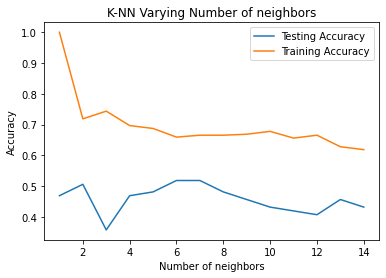

In [7]:
plt.plot(neighbors,test_accuracy,label='Testing Accuracy')
plt.plot(neighbors, train_accuracy,label='Training Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.title('K-NN Varying Number of neighbors')
plt.show()

From this graph we can see that 11 would be the best k value 

In [8]:
# create an instance of the classifier
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=11)

In [9]:
# fit the model to our training data
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [10]:
# get accuracy
classifier.score(X_test,y_test)

0.41975308641975306

In [11]:
# making predictions on the testing set
y_pred = classifier.predict(X_test)

In [12]:
# evaluate our algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 4  0  4  0  0]
 [ 0 14  0  3  2]
 [ 7  0  5  1  2]
 [ 0  3  2  9  3]
 [ 0  3 11  6  2]]
              precision    recall  f1-score   support

      Center       0.36      0.50      0.42         8
       Point       0.70      0.74      0.72        19
       Power       0.23      0.33      0.27        15
    Shooting       0.47      0.53      0.50        17
       Small       0.22      0.09      0.13        22

    accuracy                           0.42        81
   macro avg       0.40      0.44      0.41        81
weighted avg       0.40      0.42      0.40        81



In [15]:
# compare final prediction values against true values
final_predictions = pd.DataFrame(columns = ['True Ranking','Predicted Ranking'])
y_test = list(y_test)
y_pred = list(y_pred)
for i in range(0,len(y_test)):
    new_row = {'True Position': y_test[i],'Predicted Position': y_pred[i]}
    final_predictions = final_predictions.append(new_row, ignore_index=True)
    
final_predictions

,True Ranking,Predicted Ranking
0,Small,Power
1,Power,Center
2,Power,Power
3,Point,Point
4,Power,Power
...,...,...
76,Point,Shooting
77,Shooting,Shooting
78,Shooting,Shooting
79,Power,Center
